# Data Analysis 6
---
Main ideas and dataset from [KeithGalli/Pandas-Data-Science-Tasks](https://github.com/KeithGalli/Pandas-Data-Science-Tasks)

En este dataset se unirán 12 datasets de las ventas en una tienda y depués de limpiar los datos exploraremos el dataset. Se obtendrán aspectos interesantes como la correlación entre el precio y número de ventas de un producto, los productos más vendidos por separado y en paquetes de 2 y 3, también se analiza el estado, dia y mes con más ventas.

In [102]:
import pandas as pd
import os
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from collections import Counter
sns.set_theme()

### Merging Data
---

In [12]:
files = [name for name in os.listdir("./archive/SalesAnalysis/Sales_Data")]

all_months = pd.DataFrame()

for name in files:
    if name != "all_months.csv":
        df = pd.read_csv("./archive/SalesAnalysis/Sales_Data/" + name)
        all_months = pd.concat([all_months, df])


all_months.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [3]:
df = pd.read_csv("./archive/SalesAnalysis/Sales_Data/Sales_April_2019.csv")
df.info()
del(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


In [4]:
df = pd.read_csv("./archive/SalesAnalysis/Sales_Data/Sales_August_2019.csv")
df.info()
del(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12011 entries, 0 to 12010
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          11983 non-null  object
 1   Product           11983 non-null  object
 2   Quantity Ordered  11983 non-null  object
 3   Price Each        11983 non-null  object
 4   Order Date        11983 non-null  object
 5   Purchase Address  11983 non-null  object
dtypes: object(6)
memory usage: 563.1+ KB


Con esto queda claro que tenemos todo el dataset, pues solo de los primeros dos datasets, deberíamos tener 29'000+ elementos, sin embargo solo tenemos 186'000+. Ahora guardamos el documento en un csv 

In [13]:
all_months.to_csv("./archive/SalesAnalysis/Sales_Data/all_months.csv", index = False)

### Limpiando el dataset
---

In [2]:
all_data = pd.read_csv("./archive/SalesAnalysis/Sales_Data/all_months.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
all_data.loc[all_data["Order Date"].isna() == True]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
all_data.loc[all_data["Order Date"].isna() == True].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 1 to 186826
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          0 non-null      object
 1   Product           0 non-null      object
 2   Quantity Ordered  0 non-null      object
 3   Price Each        0 non-null      object
 4   Order Date        0 non-null      object
 5   Purchase Address  0 non-null      object
dtypes: object(6)
memory usage: 29.8+ KB


In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [6]:
all_data.dropna(axis=0, how='all', inplace=True)
all_data.loc[all_data["Order Date"].isna() == True]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
# all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype('i4')
# Raised ValueError: invalid literal for int() with base 10: 'Quantity Ordered'

In [9]:
all_data.loc[all_data["Quantity Ordered"] == "Quantity Ordered"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
all_data = all_data.loc[all_data["Quantity Ordered"] != "Quantity Ordered"]

In [11]:
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype('i4')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  int32 
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: int32(1), object(5)
memory usage: 9.2+ MB


In [12]:
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

In [13]:
all_data["fecha"] = pd.to_datetime(all_data["Order Date"])
all_data.drop(columns="Order Date", inplace = True)
all_data.set_index("fecha", inplace=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address
fecha,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001"
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215"
2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001"
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001"
2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001"


In [14]:
def atributos_fecha(data):
  data['anio'] = data.index.year
  data['mes'] = data.index.month_name()
  data['dia_mes'] = data.index.day
  data['dia_semana'] = data.index.day_name()
  data['hora'] = data.index.hour

In [15]:
atributos_fecha(all_data)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,anio,mes,dia_mes,dia_semana,hora
fecha,,,,,,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019,April,19,Friday,8
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019,April,7,Sunday,22
2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019,April,12,Friday,14
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019,April,12,Friday,14
2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019,April,30,Tuesday,9


In [16]:
all_data["total_venta"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,anio,mes,dia_mes,dia_semana,hora,total_venta
fecha,,,,,,,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019,April,19,Friday,8,23.90
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019,April,7,Sunday,22,99.99
2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019,April,12,Friday,14,600.00
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019,April,12,Friday,14,11.99
2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019,April,30,Tuesday,9,11.99
2019-04-29 13:03:00,176562,USB-C Charging Cable,1,11.95,"381 Wilson St, San Francisco, CA 94016",2019,April,29,Monday,13,11.95
2019-04-02 07:46:00,176563,Bose SoundSport Headphones,1,99.99,"668 Center St, Seattle, WA 98101",2019,April,2,Tuesday,7,99.99
2019-04-12 10:58:00,176564,USB-C Charging Cable,1,11.95,"790 Ridge St, Atlanta, GA 30301",2019,April,12,Friday,10,11.95
2019-04-24 10:38:00,176565,Macbook Pro Laptop,1,1700.00,"915 Willow St, San Francisco, CA 94016",2019,April,24,Wednesday,10,1700.00


Para la ubicación notamos un patron, primero va la calle, luego la ciudad, seguida del estado y al final el código postal, procedemos a separar todos sus componentes.

In [17]:
direcciones_df = all_data.copy()[["Purchase Address"]]
direcciones_df.head()

,Purchase Address
fecha,
2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [18]:
direcciones_df = direcciones_df["Purchase Address"].str.split(pat=",", expand=True)
direcciones_df.columns = ["calle", "ciudad", "pendiente"]
direcciones_df.head()


,calle,ciudad,pendiente
fecha,,,
2019-04-19 08:46:00,917 1st St,Dallas,TX 75001
2019-04-07 22:30:00,682 Chestnut St,Boston,MA 02215
2019-04-12 14:38:00,669 Spruce St,Los Angeles,CA 90001
2019-04-12 14:38:00,669 Spruce St,Los Angeles,CA 90001
2019-04-30 09:27:00,333 8th St,Los Angeles,CA 90001


In [19]:
direcciones_df["estado"] = direcciones_df["pendiente"].str.strip().str.split(pat=" ", expand=True)[0]
direcciones_df["cp"] = direcciones_df["pendiente"].str.strip().str.split(pat=" ", expand=True)[1]
direcciones_df.drop(columns="pendiente", axis=1, inplace=True)
direcciones_df.head()

,calle,ciudad,estado,cp
fecha,,,,
2019-04-19 08:46:00,917 1st St,Dallas,TX,75001
2019-04-07 22:30:00,682 Chestnut St,Boston,MA,02215
2019-04-12 14:38:00,669 Spruce St,Los Angeles,CA,90001
2019-04-12 14:38:00,669 Spruce St,Los Angeles,CA,90001
2019-04-30 09:27:00,333 8th St,Los Angeles,CA,90001


In [20]:
all_data = pd.concat([all_data, direcciones_df], axis=1)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,anio,mes,dia_mes,dia_semana,hora,total_venta,calle,ciudad,estado,cp
fecha,,,,,,,,,,,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",2019,April,19,Friday,8,23.90,917 1st St,Dallas,TX,75001
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",2019,April,7,Sunday,22,99.99,682 Chestnut St,Boston,MA,02215
2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",2019,April,12,Friday,14,600.00,669 Spruce St,Los Angeles,CA,90001
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",2019,April,12,Friday,14,11.99,669 Spruce St,Los Angeles,CA,90001
2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",2019,April,30,Tuesday,9,11.99,333 8th St,Los Angeles,CA,90001


In [21]:
all_data.drop(columns='Purchase Address', axis=1, inplace=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,anio,mes,dia_mes,dia_semana,hora,total_venta,calle,ciudad,estado,cp
fecha,,,,,,,,,,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,2019,April,19,Friday,8,23.90,917 1st St,Dallas,TX,75001
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,2019,April,7,Sunday,22,99.99,682 Chestnut St,Boston,MA,02215
2019-04-12 14:38:00,176560,Google Phone,1,600.00,2019,April,12,Friday,14,600.00,669 Spruce St,Los Angeles,CA,90001
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,2019,April,12,Friday,14,11.99,669 Spruce St,Los Angeles,CA,90001
2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,2019,April,30,Tuesday,9,11.99,333 8th St,Los Angeles,CA,90001


In [79]:
all_data["ciudad-estado"] = all_data["ciudad"] + " (" + all_data["estado"] + ")"

### Insights
---

In [80]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,anio,mes,dia_mes,dia_semana,hora,total_venta,calle,ciudad,estado,cp,ciudad-estado
fecha,,,,,,,,,,,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,2019,April,19,Friday,8,23.90,917 1st St,Dallas,TX,75001,Dallas (TX)
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,2019,April,7,Sunday,22,99.99,682 Chestnut St,Boston,MA,02215,Boston (MA)
2019-04-12 14:38:00,176560,Google Phone,1,600.00,2019,April,12,Friday,14,600.00,669 Spruce St,Los Angeles,CA,90001,Los Angeles (CA)
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,2019,April,12,Friday,14,11.99,669 Spruce St,Los Angeles,CA,90001,Los Angeles (CA)
2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,2019,April,30,Tuesday,9,11.99,333 8th St,Los Angeles,CA,90001,Los Angeles (CA)


Veamos qué mes obtuvo el mayor número de ventas

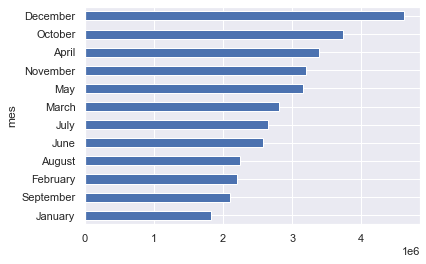

In [34]:
all_data.groupby("mes")["total_venta"].sum().sort_values().plot.barh();

El estado con más ventas

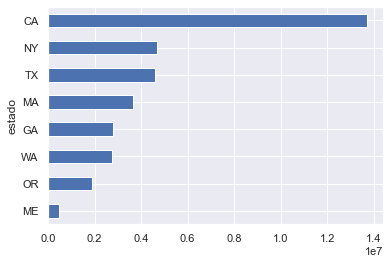

In [35]:
all_data.groupby("estado")["total_venta"].sum().sort_values().plot(kind="barh");

La ciudad con más ventas:

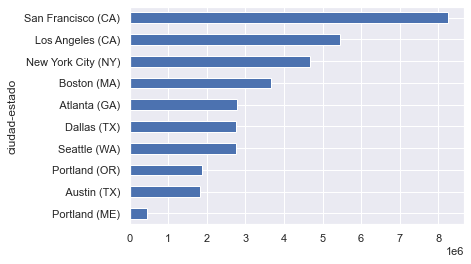

In [42]:
all_data.groupby("ciudad-estado")["total_venta"].sum().sort_values().plot(kind="barh");

La hora en la que hay más ventas

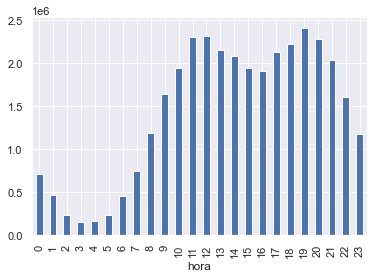

In [49]:
all_data.groupby("hora")["total_venta"].sum().plot(kind="bar");

Hacíendolo con matplotlib.

In [50]:
# test para dejar claro que haremos después.
horas = list()
for hora, df in all_data.groupby("hora"):
    horas.append(hora)
horas = np.array(horas)
horas # lo mismo que np.arange(24)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

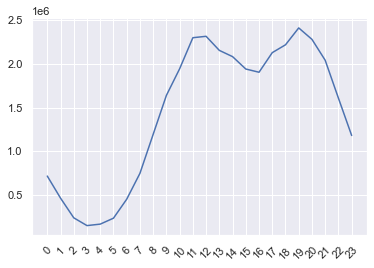

In [57]:
fig, ax = plt.subplots(1,1)

ax.plot(
    (horas_ := [horas for horas, _ in all_data.groupby("hora")]),
    all_data.groupby("hora")["total_venta"].sum()
    )

ax.set_xticks(horas_)
ax.set_xticklabels(horas_, rotation=45)

plt.show()

En forma de barra

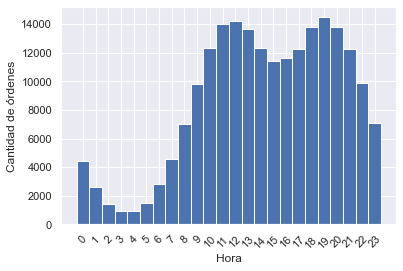

In [61]:
fig, ax = plt.subplots(1,1)

ax.bar(
    horas_,
    all_data.groupby("hora")["Quantity Ordered"].sum(),
    width=1
    )

ax.set_xticks(horas_)
ax.set_xticklabels(horas_, rotation=45)

ax.set_xlabel("Hora")
ax.set_ylabel("Cantidad de órdenes")

plt.show()

Utilizando seaborn

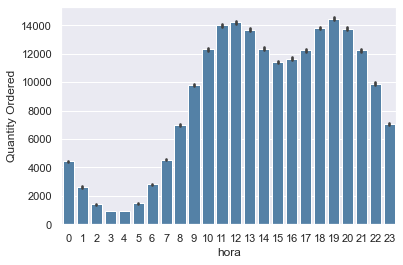

In [70]:
sns.barplot(data=all_data, x="hora", y="Quantity Ordered", estimator=sum, color="steelblue");

Si quisieramos ver el comportamiento que tiene en cada ciudad

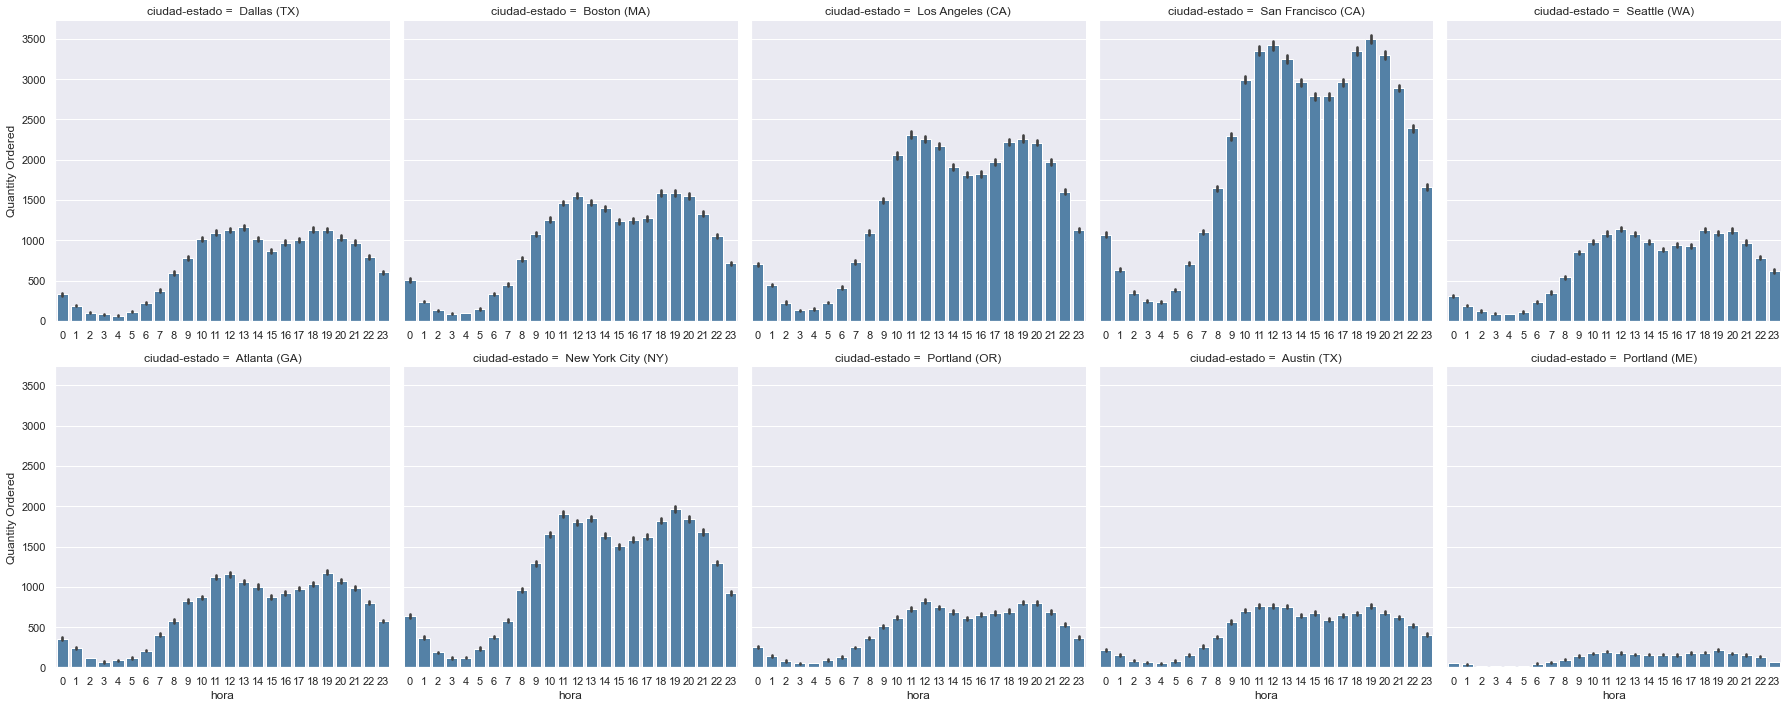

In [84]:
sns.catplot(data=all_data, x="hora", y="Quantity Ordered", estimator=sum, color="steelblue",
           kind="bar", col="ciudad-estado", col_wrap=5, sharex=False);

Veamos el día de la semana con más ventas

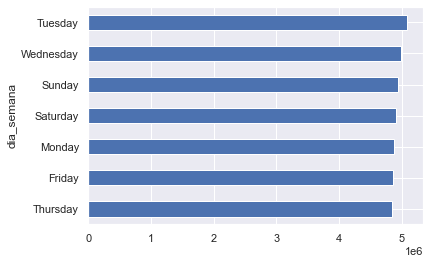

In [81]:
all_data.groupby("dia_semana")["total_venta"].sum().sort_values().plot(kind="barh");

El dia de la semana con más órdenes de acuerdo al estado

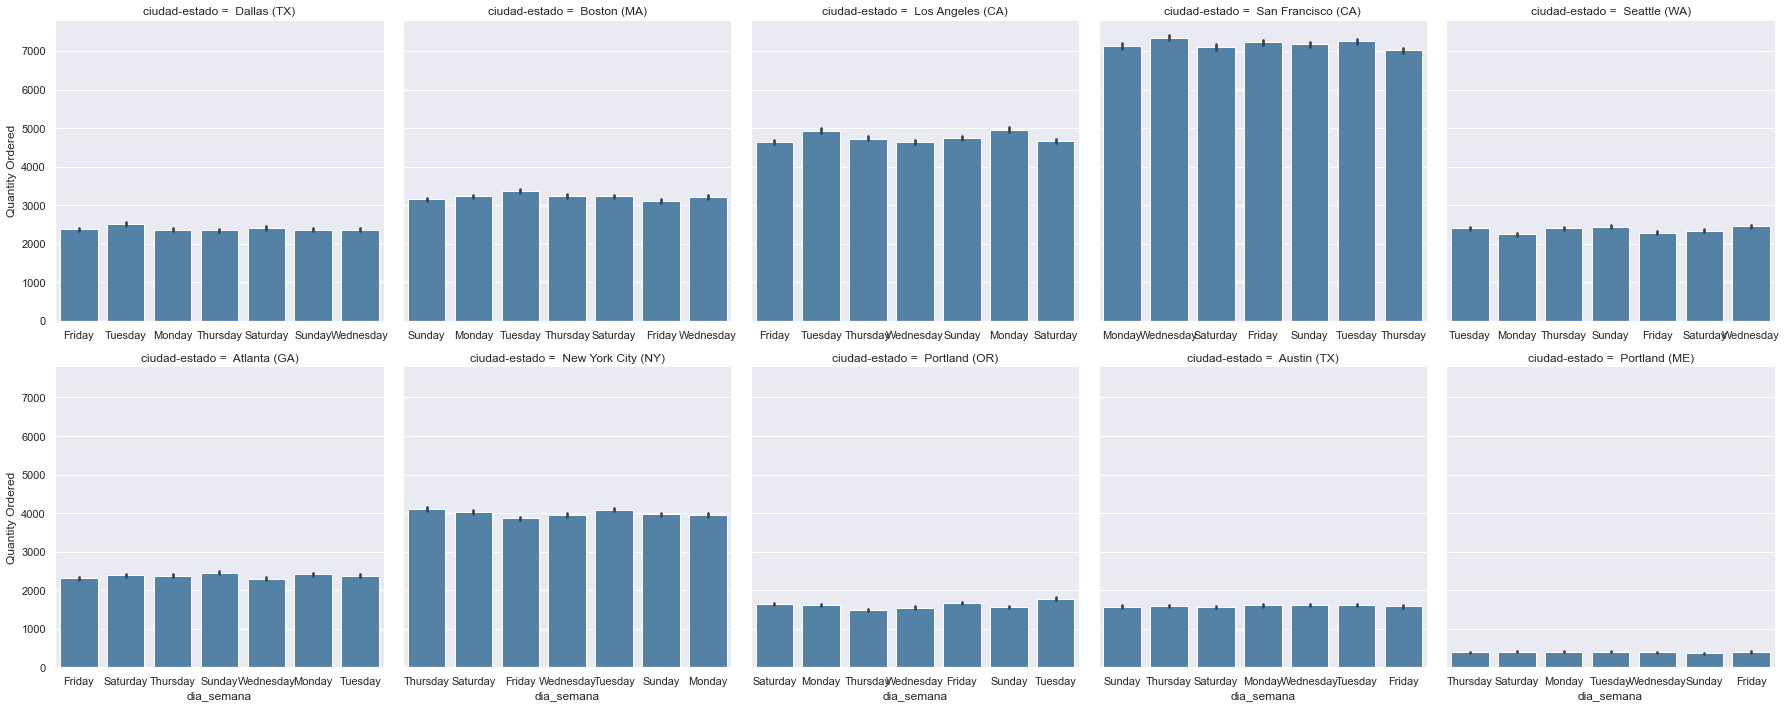

In [82]:
sns.catplot(data=all_data, x="dia_semana", y="Quantity Ordered", estimator=sum, color="steelblue",
           kind="bar", col="ciudad-estado", col_wrap=5, sharex=False);

Ahora veamos los productos más vendidos

<AxesSubplot:ylabel='Product'>

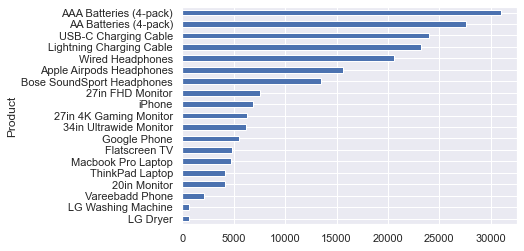

In [86]:
all_data.groupby("Product")["Quantity Ordered"].sum().sort_values().plot(kind="barh")

Comparemos la cantidad de ventas del producto con el precio del producto y veamos si encontramos alguna relación

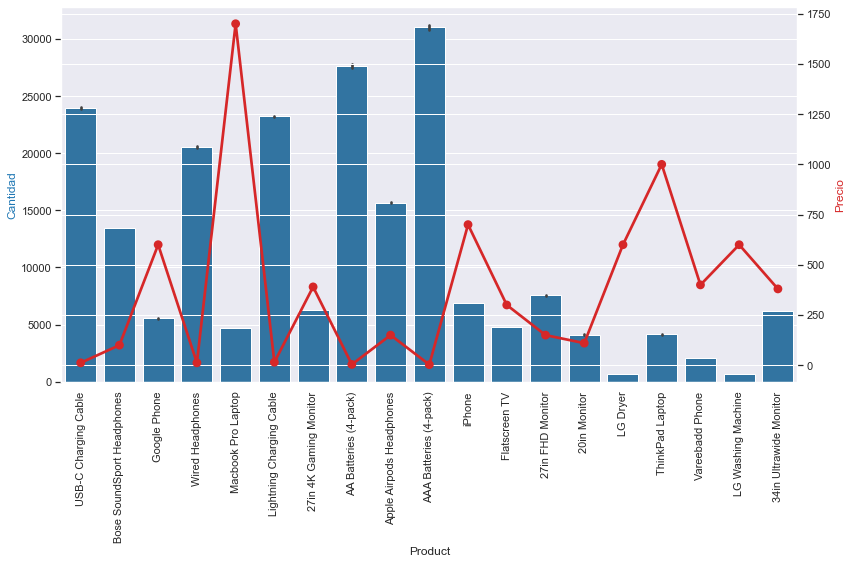

In [120]:
fig, ax1 = plt.subplots(1,1, figsize=(12,8), sharex=True)
sns.barplot(x='Product', y='Quantity Ordered', data=all_data,
            estimator=sum, ax=ax1, color='tab:blue');

ax1.set_ylabel('Cantidad', color='tab:blue')
ax1.tick_params(axis='x', rotation=90)

ax2 = ax1.twinx()

sns.pointplot(x='Product', y='Price Each', data=all_data,
            color='tab:red', ax=ax2, 
            linestyle=['--']);

ax2.set_ylabel("Precio", color='tab:red')

fig.tight_layout()

In [174]:
precio_cantidad = all_data.groupby("Product").agg({
    'Quantity Ordered': sum,
    'Price Each': 'first'})
precio_cantidad

,Quantity Ordered,Price Each
Product,,
20in Monitor,4129,109.99
27in 4K Gaming Monitor,6244,389.99
27in FHD Monitor,7550,149.99
34in Ultrawide Monitor,6199,379.99
AA Batteries (4-pack),27635,3.84
AAA Batteries (4-pack),31017,2.99
Apple Airpods Headphones,15661,150.00
Bose SoundSport Headphones,13457,99.99
Flatscreen TV,4819,300.00


In [173]:
precio_cantidad.corr()

,Quantity Ordered,Price Each
Quantity Ordered,1.000000,-0.601443
Price Each,-0.601443,1.000000


#### Podemos interpretar este resultado como que a medida que aumenta el precio disminuyen las ventas, con $R=-0.60$

Los productos que más se venden ***juntos***

In [87]:
all_data.head(20)

,Order ID,Product,Quantity Ordered,Price Each,anio,mes,dia_mes,dia_semana,hora,total_venta,calle,ciudad,estado,cp,ciudad-estado
fecha,,,,,,,,,,,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,2019,April,19,Friday,8,23.90,917 1st St,Dallas,TX,75001,Dallas (TX)
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,2019,April,7,Sunday,22,99.99,682 Chestnut St,Boston,MA,02215,Boston (MA)
2019-04-12 14:38:00,176560,Google Phone,1,600.00,2019,April,12,Friday,14,600.00,669 Spruce St,Los Angeles,CA,90001,Los Angeles (CA)
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,2019,April,12,Friday,14,11.99,669 Spruce St,Los Angeles,CA,90001,Los Angeles (CA)
2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,2019,April,30,Tuesday,9,11.99,333 8th St,Los Angeles,CA,90001,Los Angeles (CA)
2019-04-29 13:03:00,176562,USB-C Charging Cable,1,11.95,2019,April,29,Monday,13,11.95,381 Wilson St,San Francisco,CA,94016,San Francisco (CA)
2019-04-02 07:46:00,176563,Bose SoundSport Headphones,1,99.99,2019,April,2,Tuesday,7,99.99,668 Center St,Seattle,WA,98101,Seattle (WA)
2019-04-12 10:58:00,176564,USB-C Charging Cable,1,11.95,2019,April,12,Friday,10,11.95,790 Ridge St,Atlanta,GA,30301,Atlanta (GA)
2019-04-24 10:38:00,176565,Macbook Pro Laptop,1,1700.00,2019,April,24,Wednesday,10,1700.00,915 Willow St,San Francisco,CA,94016,San Francisco (CA)


Notemos que hay productos que tienen el mismo id en la orden y fueron comprados en el mismo momento. Esto indica que la compra de los productos fue una misma orden. También encontramos los productos que se vendieron en cantidades mayores a 1, por ejemplo, los productos pedidos en mayor cantidad

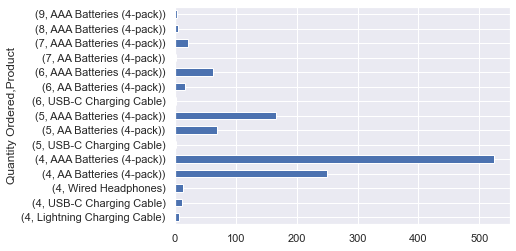

In [97]:
all_data.loc[all_data["Quantity Ordered"] > 1].groupby("Quantity Ordered")["Product"].value_counts(ascending=True).tail(15).plot(kind="barh");

O la cantidad y productos más ordenada. 

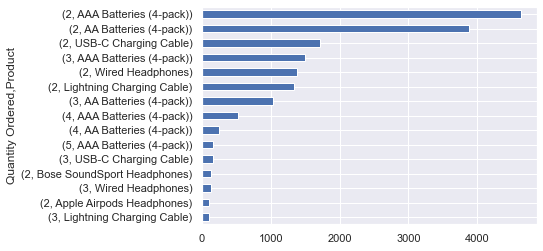

In [95]:
all_data.loc[all_data["Quantity Ordered"] > 1].groupby("Quantity Ordered")["Product"].value_counts(ascending=True).sort_values().tail(15).plot(kind="barh");

Para ver los productos que vienen de la misma orden podemos hacer esto:

In [100]:
duplicados = all_data.copy()[all_data["Order ID"].duplicated(keep=False)]
duplicados.head()

,Order ID,Product,Quantity Ordered,Price Each,anio,mes,dia_mes,dia_semana,hora,total_venta,calle,ciudad,estado,cp,ciudad-estado
fecha,,,,,,,,,,,,,,,
2019-04-12 14:38:00,176560,Google Phone,1,600.00,2019,April,12,Friday,14,600.00,669 Spruce St,Los Angeles,CA,90001,Los Angeles (CA)
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,2019,April,12,Friday,14,11.99,669 Spruce St,Los Angeles,CA,90001,Los Angeles (CA)
2019-04-03 19:42:00,176574,Google Phone,1,600.00,2019,April,3,Wednesday,19,600.00,20 Hill St,Los Angeles,CA,90001,Los Angeles (CA)
2019-04-03 19:42:00,176574,USB-C Charging Cable,1,11.95,2019,April,3,Wednesday,19,11.95,20 Hill St,Los Angeles,CA,90001,Los Angeles (CA)
2019-04-07 11:31:00,176585,Bose SoundSport Headphones,1,99.99,2019,April,7,Sunday,11,99.99,823 Highland St,Boston,MA,02215,Boston (MA)


In [101]:
duplicados = duplicados.groupby("Order ID")["Product"].apply(lambda x: ', '.join(x))
duplicados.head()

Order ID
141275             USB-C Charging Cable, Wired Headphones
141290    Apple Airpods Headphones, AA Batteries (4-pack)
141365                  Vareebadd Phone, Wired Headphones
141384                 Google Phone, USB-C Charging Cable
141450           Google Phone, Bose SoundSport Headphones
Name: Product, dtype: object

Para ver la pareja de productos más vendida

In [104]:
count = Counter()

for productos in duplicados:
    producto_lista = productos.split(', ')
    count.update(Counter(
        combinations(producto_lista, 2)
    ))
    
for key, val in count.most_common(10):
  print(key, val)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Para ver la tercia de productos más vendida

In [106]:
count = Counter()

for productos in duplicados:
    producto_lista = productos.split(', ')
    count.update(Counter(
        combinations(producto_lista, 3)
    ))
    
for key, val in count.most_common(10):
  print(key, val)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
